In [ ]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
data  test  test_ford  validation  VGG.ipynb


In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/data", target_size=(224,224))
valdata = ImageDataGenerator()
valtdata = valdata.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/validation", target_size=(224,224))

Found 5825 images belonging to 2 classes.
Found 750 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
opt = Adam(lr=0.000005)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [ ]:
import time
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
start_time = time.time()
hist = model.fit_generator(steps_per_epoch=7, generator=traindata, validation_data=valdata, validation_steps=10, epochs=100, callbacks=[checkpoint, early])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
7/7 [==============================] - 202s 29s/step - loss: 0.6318 - accuracy: 0.6607 - val_loss: 0.4983 - val_accuracy: 0.8719

Epoch 00001: val_accuracy improved from -inf to 0.87187, saving model to vgg16_1.h5
Epoch 2/100
7/7 [==============================] - 205s 29s/step - loss: 0.5049 - accuracy: 0.8170 - val_loss: 0.2589 - val_accuracy: 0.8750

Epoch 00002: val_accuracy improved from 0.87187 to 0.87500, saving model to vgg16_1.h5
Epoch 3/100
7/7 [==============================] - 65s 9s/step - loss: 0.3816 - accuracy: 0.8616 - val_loss: 0.2616 - val_accuracy: 0.8775

Epoch 00003: val_accuracy improved from 0.87500 to 0.87748, saving model to vgg16_1.h5
Epoch 4/100
7/7 [==============================] - 82s 12s/step - loss: 0.3502 - accuracy: 0.8304 - val_loss: 0.1894 - val_accuracy: 0.8562

Epoch 00004: val_accuracy did not improve from 0.87748
Epoch 5/100
7/7 [==============================] - 139s 20s/step - loss: 0.2670 - accuracy: 0.9062 - val_loss: 0.1930 - va

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 159 could not be retrieved. It could be because a worker has died.
  UserWarning)


7/7 [==============================] - 163s 23s/step - loss: 0.2520 - accuracy: 0.9018 - val_loss: 0.4013 - val_accuracy: 0.8938

Epoch 00009: val_accuracy did not improve from 0.90397
Epoch 10/100
7/7 [==============================] - 145s 21s/step - loss: 0.1849 - accuracy: 0.9464 - val_loss: 0.2528 - val_accuracy: 0.8841

Epoch 00010: val_accuracy did not improve from 0.90397
Epoch 11/100
7/7 [==============================] - 140s 20s/step - loss: 0.2504 - accuracy: 0.9152 - val_loss: 0.3650 - val_accuracy: 0.9000

Epoch 00011: val_accuracy did not improve from 0.90397
Epoch 12/100
7/7 [==============================] - 141s 20s/step - loss: 0.2246 - accuracy: 0.9018 - val_loss: 0.1485 - val_accuracy: 0.8907

Epoch 00012: val_accuracy did not improve from 0.90397
Epoch 13/100
7/7 [==============================] - 142s 20s/step - loss: 0.1927 - accuracy: 0.9375 - val_loss: 0.2900 - val_accuracy: 0.7969

Epoch 00013: val_accuracy did not improve from 0.90397
Epoch 14/100
7/7 [=====

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 165 could not be retrieved. It could be because a worker has died.
  UserWarning)


7/7 [==============================] - 202s 29s/step - loss: 0.2171 - accuracy: 0.9152 - val_loss: 0.0630 - val_accuracy: 0.8642

Epoch 00024: val_accuracy did not improve from 0.94375
Epoch 25/100
7/7 [==============================] - 117s 17s/step - loss: 0.0944 - accuracy: 0.9689 - val_loss: 0.2366 - val_accuracy: 0.9156

Epoch 00025: val_accuracy did not improve from 0.94375
Epoch 26/100
3/7 [===========>..................] - ETA: 1:18 - loss: 0.1074 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 176 could not be retrieved. It could be because a worker has died.
  UserWarning)


7/7 [==============================] - 203s 29s/step - loss: 0.1151 - accuracy: 0.9688 - val_loss: 0.0462 - val_accuracy: 0.8719

Epoch 00026: val_accuracy did not improve from 0.94375
Epoch 27/100
7/7 [==============================] - 21s 3s/step - loss: 0.1071 - accuracy: 0.9598 - val_loss: 0.3370 - val_accuracy: 0.9007

Epoch 00027: val_accuracy did not improve from 0.94375
Epoch 28/100
7/7 [==============================] - 3s 373ms/step - loss: 0.1377 - accuracy: 0.9554 - val_loss: 0.1710 - val_accuracy: 0.9187

Epoch 00028: val_accuracy did not improve from 0.94375
Epoch 29/100
7/7 [==============================] - 3s 370ms/step - loss: 0.0813 - accuracy: 0.9777 - val_loss: 0.2864 - val_accuracy: 0.9205

Epoch 00029: val_accuracy did not improve from 0.94375
Epoch 30/100
7/7 [==============================] - 3s 378ms/step - loss: 0.0992 - accuracy: 0.9643 - val_loss: 0.2330 - val_accuracy: 0.9031

Epoch 00030: val_accuracy did not improve from 0.94375
Epoch 31/100
7/7 [=======

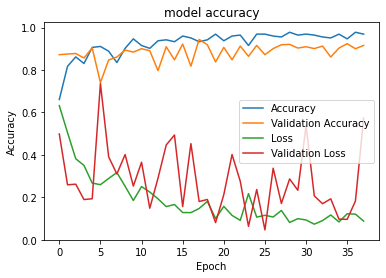

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/test", target_size=(224,224))
score, acc = saved_model.evaluate_generator(test_generator)
print('Test score:', score)
print('Test accuracy:', acc)

Found 750 images belonging to 2 classes.
Test score: 0.1041625589132309
Test accuracy: 0.9666666388511658


In [ ]:
# test_datagen_ford = ImageDataGenerator()
# test_generator_ford = test_datagen.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/test_ford", target_size=(224,224))
# score_ford, acc_ford = saved_model.evaluate_generator(test_generator)
# print('Test score:', score_ford)
# print('Test accuracy:', acc_ford)

Found 740 images belonging to 2 classes.
Test score: 0.0567002110183239
Test accuracy: 0.9702702760696411
